# Data Science Project: Student Academic Performance

### Student Name: Sameer Anees Jaliawala
### Student ID: sj02732
### Student Email: sj02732@st.habib.edu.pk

## 1. Importing Libraries and Dataset

In [53]:
#importing libraries
from scipy.io import arff
import pandas as pd
import numpy as np
# the dataset can be downloaded from here: https://archive.ics.uci.edu/ml/machine-learning-databases/00467/
#importing dataset
data,meta = arff.loadarff('Sapfile1.arff')
print(meta)
df = pd.DataFrame(data)

Dataset: Sapfile1
	ge's type is nominal, range is ('M', 'F')
	cst's type is nominal, range is ('G', 'ST', 'SC', 'OBC', 'MOBC')
	tnp's type is nominal, range is ('Best', 'Vg', 'Good', 'Pass', 'Fail')
	twp's type is nominal, range is ('Best', 'Vg', 'Good', 'Pass', 'Fail')
	iap's type is nominal, range is ('Best', 'Vg', 'Good', 'Pass', 'Fail')
	esp's type is nominal, range is ('Best', 'Vg', 'Good', 'Pass', 'Fail')
	arr's type is nominal, range is ('Y', 'N')
	ms's type is nominal, range is ('Married', 'Unmarried')
	ls's type is nominal, range is ('T', 'V')
	as's type is nominal, range is ('Free', 'Paid')
	fmi's type is nominal, range is ('Vh', 'High', 'Am', 'Medium', 'Low')
	fs's type is nominal, range is ('Large', 'Average', 'Small')
	fq's type is nominal, range is ('Il', 'Um', '10', '12', 'Degree', 'Pg')
	mq's type is nominal, range is ('Il', 'Um', '10', '12', 'Degree', 'Pg')
	fo's type is nominal, range is ('Service', 'Business', 'Retired', 'Farmer', 'Others')
	mo's type is nominal, ran

<p>We will use scipy to load data set and then load it into dataframe. The meta data has been provided above.</p>

## 2. Decode it from utf-8 format

In [54]:
#decode from utf-8
str_df = df.select_dtypes([np.object])
str_df = str_df.stack().str.decode('utf-8').unstack()
#inspecting data
str_df.head()

,ge,cst,tnp,twp,iap,esp,arr,ms,ls,as,...,fq,mq,fo,mo,nf,sh,ss,me,tt,atd
0,F,G,Good,Good,Vg,Good,Y,Unmarried,V,Paid,...,Um,10,Farmer,Housewife,Large,Poor,Govt,Asm,Small,Good
1,M,OBC,Vg,Vg,Vg,Vg,N,Unmarried,V,Paid,...,Um,Il,Service,Service,Small,Poor,Govt,Asm,Average,Average
2,F,OBC,Good,Good,Vg,Good,N,Unmarried,V,Paid,...,12,10,Service,Housewife,Average,Average,Govt,Asm,Large,Good
3,M,MOBC,Pass,Good,Vg,Good,N,Unmarried,V,Paid,...,12,Um,Business,Business,Large,Poor,Govt,Asm,Average,Average
4,M,G,Good,Good,Vg,Vg,N,Unmarried,V,Paid,...,10,12,Service,Housewife,Large,Poor,Private,Asm,Small,Good


<p>As the dataset is encoded, we have to first decode all the dataframe columns. We can also see the first few rows from the dataset. A random sample of 6 has also been printed below.</p>

## 3. Inspecting Data

In [55]:
#inspecting random data
str_df.sample(n=6)

,ge,cst,tnp,twp,iap,esp,arr,ms,ls,as,...,fq,mq,fo,mo,nf,sh,ss,me,tt,atd
51,F,G,Best,Vg,Best,Best,N,Unmarried,V,Free,...,Degree,10,Business,Housewife,Average,Good,Private,Eng,Small,Good
100,M,ST,Vg,Good,Vg,Vg,N,Unmarried,V,Paid,...,Il,Il,Farmer,Housewife,Small,Poor,Govt,Eng,Small,Average
3,M,MOBC,Pass,Good,Vg,Good,N,Unmarried,V,Paid,...,12,Um,Business,Business,Large,Poor,Govt,Asm,Average,Average
7,F,OBC,Good,Good,Good,Good,N,Unmarried,V,Paid,...,Il,Um,Farmer,Housewife,Small,Poor,Private,Asm,Average,Good
21,F,G,Vg,Good,Vg,Vg,Y,Unmarried,V,Paid,...,10,10,Service,Housewife,Large,Poor,Private,Eng,Small,Good
1,M,OBC,Vg,Vg,Vg,Vg,N,Unmarried,V,Paid,...,Um,Il,Service,Service,Small,Poor,Govt,Asm,Average,Average


In [56]:
str_df.info()
str_df.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 131 entries, 0 to 130
Data columns (total 22 columns):
ge     131 non-null object
cst    131 non-null object
tnp    131 non-null object
twp    131 non-null object
iap    131 non-null object
esp    131 non-null object
arr    131 non-null object
ms     131 non-null object
ls     131 non-null object
as     131 non-null object
fmi    131 non-null object
fs     131 non-null object
fq     131 non-null object
mq     131 non-null object
fo     131 non-null object
mo     131 non-null object
nf     131 non-null object
sh     131 non-null object
ss     131 non-null object
me     131 non-null object
tt     131 non-null object
atd    131 non-null object
dtypes: object(22)
memory usage: 23.5+ KB


,ge,cst,tnp,twp,iap,esp,arr,ms,ls,as,...,fq,mq,fo,mo,nf,sh,ss,me,tt,atd
count,131,131,131,131,131,131,131,131,131,131,...,131,131,131,131,131,131,131,131,131,131
unique,2,5,4,4,4,4,2,1,2,2,...,6,6,5,5,3,3,2,4,3,3
top,M,OBC,Good,Good,Vg,Good,N,Unmarried,V,Paid,...,Um,Um,Service,Housewife,Large,Average,Govt,Eng,Small,Good
freq,72,57,59,65,63,54,78,131,92,76,...,40,52,38,115,58,59,91,62,78,56


<p>We can see from the data above that the variables are of type object and they are all categorical. We have also printed the description of the dataset that shows count, mean, unique and top and frequent values. </p>

## 4. Cleaning Data

In [57]:
#Checking for missing and null values
print("Duplicate values",str_df.duplicated().sum().sum())
print("Null Values",str_df.isnull().sum().sum())
print("Missing values",(str_df=='').sum().sum())

Duplicate values 0
Null Values 0
Missing values 0


## 5. Data Visualization

## 5.1 Bar Plots

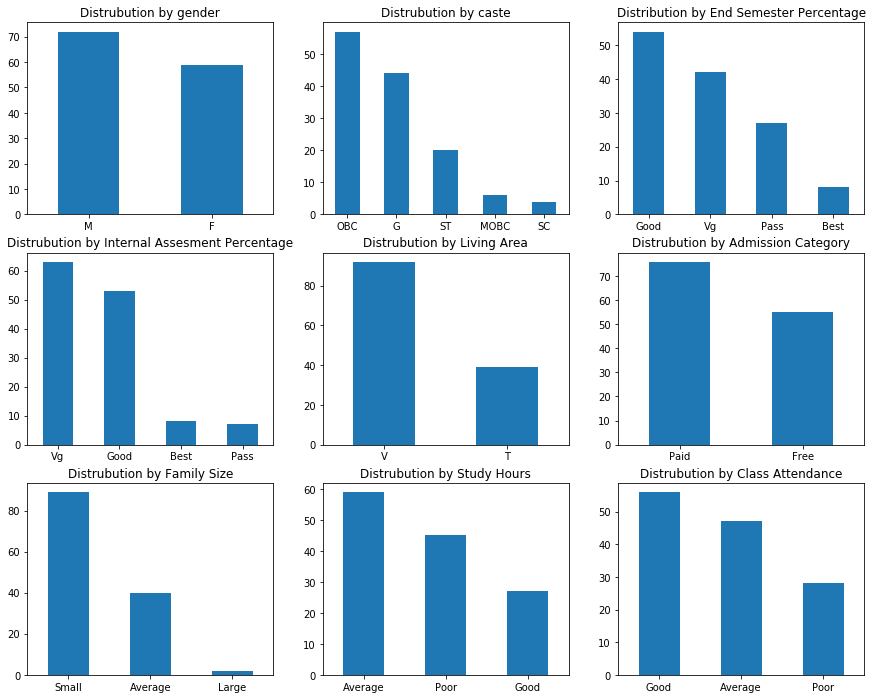

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt
fig,axes= plt.subplots(nrows=3,ncols=3,figsize=[15,12])
str_df['ge'].value_counts().plot(kind='bar',ax=axes[0,0],title="Distrubution by gender")
str_df['cst'].value_counts().plot(kind='bar',ax=axes[0,1],title="Distrubution by caste")
str_df['esp'].value_counts().plot(kind='bar',ax=axes[0,2],title="Distribution by End Semester Percentage")
str_df['iap'].value_counts().plot(kind='bar',ax=axes[1,0],title="Distrubution by Internal Assesment Percentage")
str_df['ls'].value_counts().plot(kind='bar',ax=axes[1,1],title="Distrubution by Living Area")
str_df['as'].value_counts().plot(kind='bar',ax=axes[1,2],title="Distrubution by Admission Category")
str_df['fs'].value_counts().plot(kind='bar',ax=axes[2,0],title="Distrubution by Family Size")
str_df['sh'].value_counts().plot(kind='bar',ax=axes[2,1],title="Distrubution by Study Hours")
str_df['atd'].value_counts().plot(kind='bar',ax=axes[2,2],title="Distrubution by Class Attendance")
for ax in axes.flatten():
    for label in ax.get_xticklabels():
        label.set_rotation(0)

<p>By looking at the above plots, the number of males in the data set are more than females. Also, most of these students are from “Other Backward Caste” category, whereas the least of the students belong to “Schedule Caste” category. We also plotted the End-Semester Grades and found out that most of the students received Good (60 <= esp < 80) grades, whereas only a few of the students received the Best grades (esp >= 80); however, none of the students failed.The other most interesting findings I made from these graphs are:</p>
    <ol>
        <li> Most of the students Internal Assesment percentages are very good.</li>
        <li> Most of the students are from Villages.</li>
        <li> Only a small number of students have large families or, to be specific, more than 12 students. Most of them have less than 6 people in their homes.</li>
    </ol>

## 5.2 Box Plots

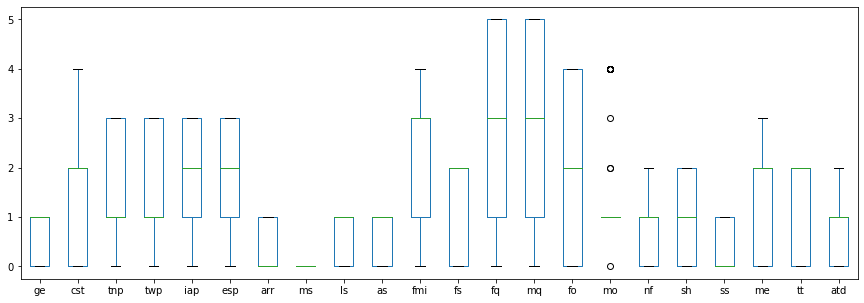

In [59]:
from sklearn.preprocessing import LabelEncoder
# Instantiate LabelEncoder
# ... YOUR CODE FOR TASK 6 ...
le = LabelEncoder()
ce=str_df
classes={}
# Iterate over all the values of each column and extract their dtypes
for col in ce:
    # Compare if the dtype is object
    if ce[col].dtype=='object':
    # Use LabelEncoder to do the numeric transformation
        ce[col]=le.fit_transform(ce[col])
        classes[col]=list(le.classes_)
ce.plot(kind="box",figsize=(15,5))

<p>As the data is categorical, we were forced to first use the label encoder to change the type of data from objects into numeric. This allowed us to go ahead and plot box plots, even though it won’t be the best way to visualize categorical data. We make some of the most interesting analysis from the above graph:</p>
<ol>
    <li>The average number of students’ fathers are “Illiterate”. Least of the students’ fathers have passed just Class Ten Examinations. The same can be seen from the box plot of Mothers Qualifications.</li>
    <li>Most of the students’ family incomes are from Above Medium, High and Low classes.</li>
    <li>There is something not right about the Marital Status of the student’s; seems like most of the students are unmarried/single, which makes sense as the students haven’t aged much.</li>
</ol>

## 5.3 Scatter Plots

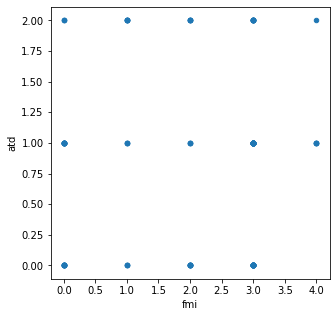

In [60]:
str_df.plot(kind="scatter",x="fmi",y="atd",figsize=(5,5))

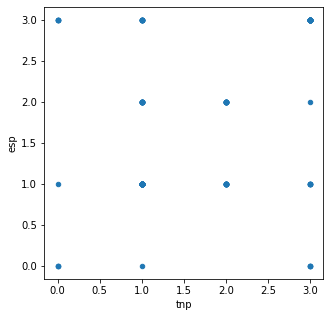

In [61]:
str_df.plot(kind="scatter",x="tnp",y="esp",figsize=(5,5))

<p>The dataset contains categorical attributes so it won’t make sense plotting scatter plots of the data. The data seems evenly distributed in both graphs, that is why the scatter plots don’t tell us any useful information.</p>

## 6 Correlation and Visualizing Plots
<p>Now we will experiment with some graphs to test out which graph gives us a better visualization of response variable against other indicators</p>

## 6.1 Bar Graphs of End-Semester-Percentage with the rest of the attributes
<p>Firstly, lets try to use seaborn bar plots using some of the attributes:</p>

In [62]:
class_df=np.array(list(classes.items()))
print(class_df)

[['ge' list(['F', 'M'])]
 ['cst' list(['G', 'MOBC', 'OBC', 'SC', 'ST'])]
 ['tnp' list(['Best', 'Good', 'Pass', 'Vg'])]
 ['twp' list(['Best', 'Good', 'Pass', 'Vg'])]
 ['iap' list(['Best', 'Good', 'Pass', 'Vg'])]
 ['esp' list(['Best', 'Good', 'Pass', 'Vg'])]
 ['arr' list(['N', 'Y'])]
 ['ms' list(['Unmarried'])]
 ['ls' list(['T', 'V'])]
 ['as' list(['Free', 'Paid'])]
 ['fmi' list(['Am', 'High', 'Low', 'Medium', 'Vh'])]
 ['fs' list(['Average', 'Large', 'Small'])]
 ['fq' list(['10', '12', 'Degree', 'Il', 'Pg', 'Um'])]
 ['mq' list(['10', '12', 'Degree', 'Il', 'Pg', 'Um'])]
 ['fo' list(['Business', 'Farmer', 'Others', 'Retired', 'Service'])]
 ['mo' list(['Business', 'Housewife', 'Others', 'Retired', 'Service'])]
 ['nf' list(['Average', 'Large', 'Small'])]
 ['sh' list(['Average', 'Good', 'Poor'])]
 ['ss' list(['Govt', 'Private'])]
 ['me' list(['Asm', 'Ben', 'Eng', 'Hin'])]
 ['tt' list(['Average', 'Large', 'Small'])]
 ['atd' list(['Average', 'Good', 'Poor'])]]


[[Text(0, 0, 'Best'),
  Text(0, 0, 'Good'),
  Text(0, 0, 'Pass'),
  Text(0, 0, 'Vg')]]

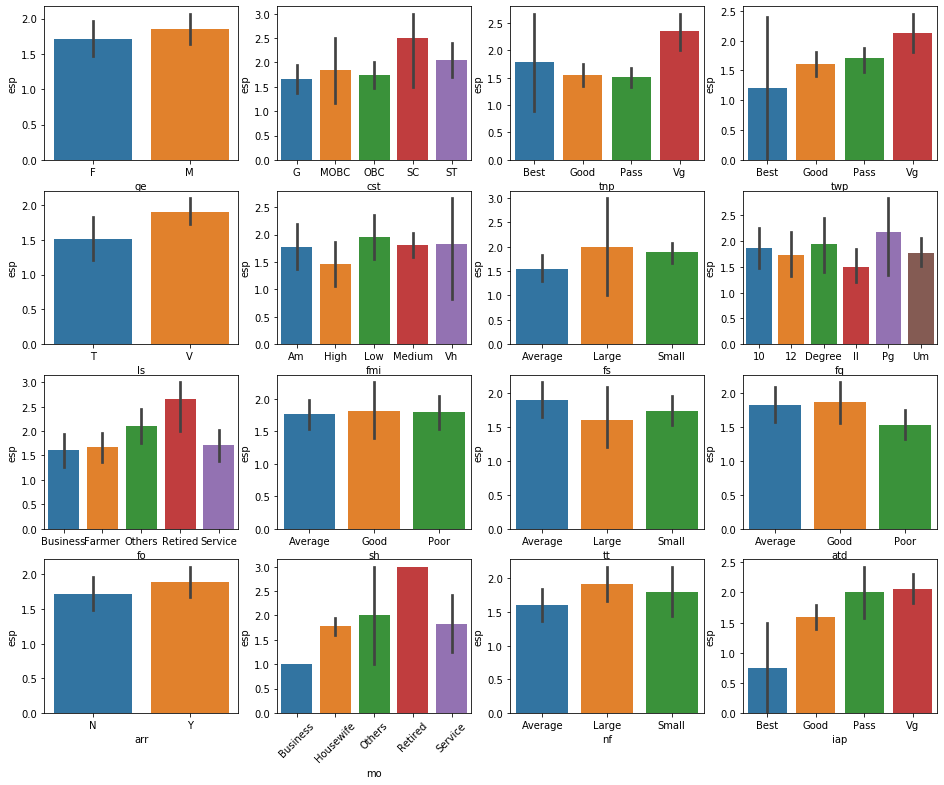

In [63]:
fig,axes= plt.subplots(nrows=4,ncols=4,figsize=[16,13])
g=sns.barplot(data=str_df,x="ge",y="esp",ax=axes[0,0])
g.set(xticklabels=classes['ge'])
g=sns.barplot(data=str_df,x="cst",y="esp",ax=axes[0,1])
g.set(xticklabels=classes['cst'])
g=sns.barplot(data=str_df,x="tnp",y="esp",ax=axes[0,2])
g.set(xticklabels=classes['tnp'])
g=sns.barplot(data=str_df,x="twp",y="esp",ax=axes[0,3])
g.set(xticklabels=classes['twp'])
g=sns.barplot(data=str_df,x="ls",y="esp",ax=axes[1,0])
g.set(xticklabels=classes['ls'])
g=sns.barplot(data=str_df,x="fmi",y="esp",ax=axes[1,1])
g.set(xticklabels=classes['fmi'])
g=sns.barplot(data=str_df,x="fs",y="esp",ax=axes[1,2])
g.set(xticklabels=classes['fs'])
g=sns.barplot(data=str_df,x="fq",y="esp",ax=axes[1,3])
g.set(xticklabels=classes['fq'])
g=sns.barplot(data=str_df,x="fo",y="esp",ax=axes[2,0])
g.set(xticklabels=classes['fo'])
g=sns.barplot(data=str_df,x="sh",y="esp",ax=axes[2,1])
g.set(xticklabels=classes['sh'])
g=sns.barplot(data=str_df,x="tt",y="esp",ax=axes[2,2])
g.set(xticklabels=classes['tt'])
g=sns.barplot(data=str_df,x="atd",y="esp",ax=axes[2,3])
g.set(xticklabels=classes['atd'])
g=sns.barplot(data=str_df,x="arr",y="esp",ax=axes[3,0])
g.set(xticklabels=classes['arr'])
g=sns.barplot(data=str_df,x="mo",y="esp",ax=axes[3,1])
g.set(xticklabels=classes['mo'])
g.set_xticklabels(g.get_xticklabels(), rotation=45)
g=sns.barplot(data=str_df,x="nf",y="esp",ax=axes[3,2])
g.set(xticklabels=classes['nf'])
g=sns.barplot(data=str_df,x="iap",y="esp",ax=axes[3,3])
g.set(xticklabels=classes['iap'])

<p>From the above graphs it seems that End Semester Percentage correlates better with columns other than Gender, Attendance, Travel Time, Study Hours and Arrears. However, this does not seem to be the optimal way to correlate data.</p>

In [64]:
#Checking marital status column
str_df['ms'].value_counts()

0    131
Name: ms, dtype: int64

<p>In the above code,we are ensuring that the students are all unmarried</p>

## 6.2 Joint Plots
<p>Let’s now move towards jointplots, which can specifically tell us the relation between two attributes:</p>

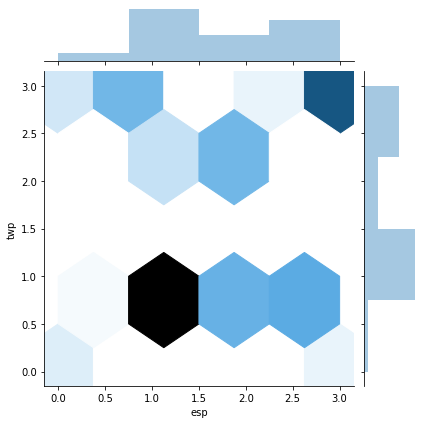

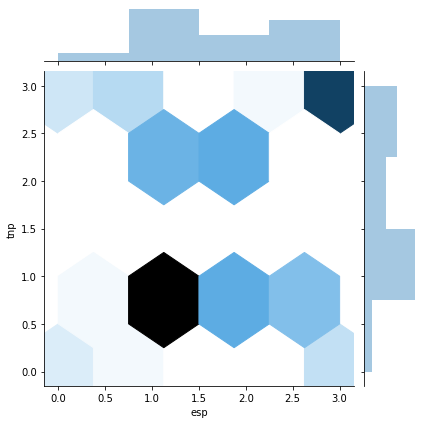

In [65]:
sns.jointplot(data=str_df,x="esp",y="twp",kind="hex")
sns.jointplot(data=str_df,x="esp",y="tnp",kind="hex")

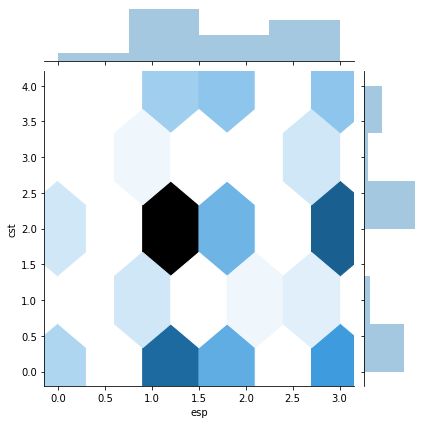

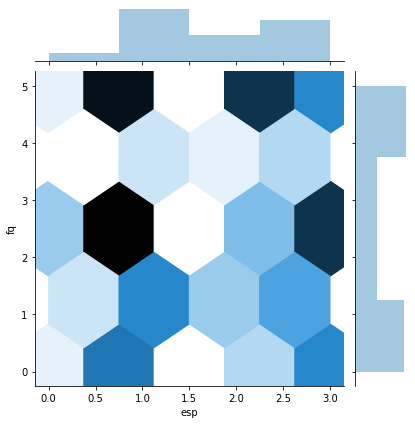

In [66]:
sns.jointplot(data=str_df,x="esp",y="cst",kind="hex")
sns.jointplot(data=str_df,x="esp",y="fq",kind="hex")

<p>From the above graphs, the ones with more dark colors show us better correlation between two attributes. Therefore, Family Qualification and caste shows us better correlation than Class XII and Class X percentages. Class XII also shows better correlation than Class X percentage, which means that students’ performances are based better on recent results than on very old results. However, these graphs take too much space and time to tell us how the indicators
12
correlate with the response variable. We need a better way to show the correlation and also let us know how each attribute’s correlation differs with each other.</p>

## 6.3 Correlation Coefficient Heat Map 
<p>We will use pandas correlation (Pearson’s Correlation Coefficient) function to give us pair wise correlation and tell us how each attribute differentiates with each other. We then use seaborn’s heatmap style matrix graph to show the result:</p>

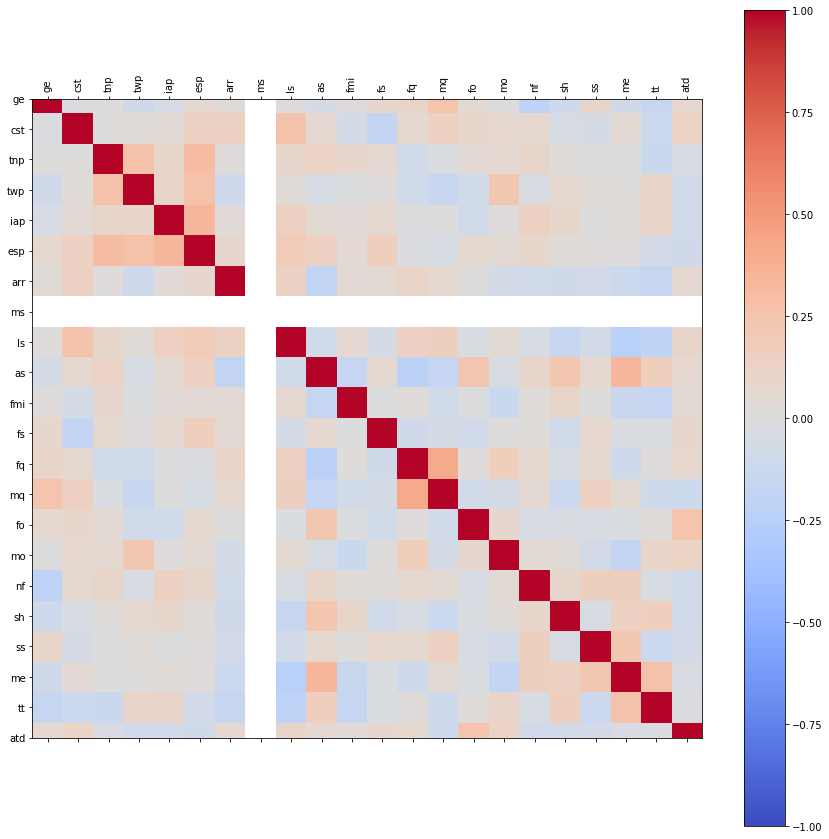

In [67]:
data=ce
corr = data.corr()
fig = plt.figure(figsize=[15,15])
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(data.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(data.columns)
ax.set_yticklabels(data.columns)
plt.show()

## 7 Feature Selection 
<p>The Final Correlations of response variable End-Semester-Percentages are:</p>

In [68]:
newset=corr[abs(corr['esp'])<0.05]['esp'].index.tolist()
newset.append('ms')
print(corr['esp'])
print(newset)

ge     0.069780
cst    0.140074
tnp    0.293045
twp    0.265710
iap    0.333076
esp    1.000000
arr    0.085867
ms          NaN
ls     0.184471
as     0.148154
fmi    0.045524
fs     0.158971
fq    -0.021203
mq    -0.039767
fo     0.058970
mo     0.047507
nf     0.087892
sh     0.017952
ss     0.009439
me     0.010564
tt    -0.072989
atd   -0.096510
Name: esp, dtype: float64
['fmi', 'fq', 'mq', 'mo', 'sh', 'ss', 'me', 'ms']


<p>After looking at the coeffients, we select those attributes that have an absolute value of more than 0.07. Below, we are selecting a sample and doing hypotheses testing, which is described in the report.</p>

In [69]:
hyp=data[:50]
hyp_corr=hyp.corr()
print(hyp_corr['ge'])
print(hyp_corr['esp'])

ge     1.000000e+00
cst    6.646584e-17
tnp   -1.464504e-01
twp   -1.924145e-02
iap   -3.934447e-02
esp    7.347184e-02
arr   -1.236128e-01
ms              NaN
ls    -1.448414e-01
as     5.205792e-02
fmi   -1.755791e-01
fs     2.111002e-01
fq     1.029059e-01
mq     2.363439e-01
fo     2.591509e-02
mo     2.305715e-02
nf     1.974881e-01
sh    -1.056207e-01
ss     4.082483e-01
me     1.377857e-01
tt    -1.469538e-01
atd   -8.137885e-02
Name: ge, dtype: float64
ge     0.073472
cst    0.142953
tnp    0.412242
twp    0.373925
iap    0.225475
esp    1.000000
arr    0.161963
ms          NaN
ls     0.251855
as     0.139605
fmi    0.202297
fs     0.269873
fq    -0.011761
mq    -0.228171
fo     0.054265
mo     0.033034
nf     0.121882
sh     0.065185
ss    -0.022496
me    -0.026032
tt    -0.191261
atd    0.161434
Name: esp, dtype: float64


<p>Therefore, we drop the attributes from the dataset, that have coeffcient less than 0.07, and then move onto splitting data into training and testing splits:</p

In [70]:
pred_esp1=ce
pred_esp1 = pred_esp1.drop(newset, axis=1)
print(pred_esp1.info())

pred_esp1 = pred_esp1.to_numpy()
# print(pred_esp1[:,5])
# Segregate features and labels into separate variables
X,y = np.append(pred_esp1[:,0:5],pred_esp1[:,6:],axis=1) , pred_esp1[:,5]
print(X.shape)
print(y.shape)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 131 entries, 0 to 130
Data columns (total 14 columns):
ge     131 non-null int32
cst    131 non-null int32
tnp    131 non-null int32
twp    131 non-null int32
iap    131 non-null int32
esp    131 non-null int32
arr    131 non-null int32
ls     131 non-null int32
as     131 non-null int32
fs     131 non-null int32
fo     131 non-null int32
nf     131 non-null int32
tt     131 non-null int32
atd    131 non-null int32
dtypes: int32(14)
memory usage: 13.2 KB
None
(131, 13)
(131,)


<p>We drop the column ‘ms’ (marital status), because every student was single. We will first convert data to numpy then split data, with one-thirds going into the testing dataset. No scaling would be necessary as data is categorical and not numerical.</p>

In [71]:
# Import train_test_split
from sklearn.model_selection import train_test_split
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,
                                y,
                                test_size=0.33,
                                random_state=42)

## 8 Supervised Learning

## 8.1 Logistic Regression

In [72]:
import warnings
warnings.simplefilter(action="ignore",category=FutureWarning)

In [73]:
# Import LogisticRegression
from sklearn.linear_model import LogisticRegression
# Instantiate a LogisticRegression classifier with default parameter values
logreg = LogisticRegression()
# Fit logreg to the train set
logreg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [74]:
# Import confusion_matrix
from sklearn.metrics import confusion_matrix
# Use logreg to predict instances from the test set and store it
y_pred = logreg.predict(X_test)
# Get the accuracy score of logreg model and print it
print("Accuracy of logistic regression classifier: ", logreg.score(X_test,y_test))
# Print the confusion matrix of the logreg model
confusion_matrix(y_test,y_pred)

Accuracy of logistic regression classifier:  0.5227272727272727


array([[ 0,  1,  1,  2],
       [ 0, 13,  4,  5],
       [ 0,  1,  3,  0],
       [ 0,  5,  2,  7]], dtype=int64)

## 8.2 Random Forrest

In [75]:
# Import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
# Instantiate a RandomForest classifier with default parameter values
max=0
max_random=0
for i in range(200):
    clf = RandomForestClassifier(random_state=i)
    # Fit clf to the train set
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    # Get the accuracy score of clf model and print it
    # Print the confusion matrix of the logreg model
    if(clf.score(X_test,y_test)>max):
        max=clf.score(X_test,y_test)
        max_random=i
print("Accuracy of random forest classifier: ", clf.score(X_test,y_test),max_random)

Accuracy of random forest classifier:  0.5681818181818182 104


## 8.3 Naive Bayes Classifier

In [76]:
import sklearn.naive_bayes as nv
clf = nv.GaussianNB()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy of naive bayes classifier: ", clf.score(X_test,y_test))

Accuracy of naive bayes classifier:  0.5909090909090909


## 8.4 Neural Network

In [77]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
confusion_matrix(y_test,y_pred)
print("Accuracy of neural network classifier: ", clf.score(X_test,y_test))

Accuracy of neural network classifier:  0.5227272727272727


C:\Users\samee\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


## 8.5 Decision Tree

In [78]:
from sklearn import tree
max=0
max_random=0
for i in range(200):
    clf = tree.DecisionTreeClassifier(random_state=i)
    # Fit clf to the train set
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    # Get the accuracy score of clf model and print it
    # Print the confusion matrix of the logreg model
    confusion_matrix(y_test,y_pred)
    if(clf.score(X_test,y_test)>max):
        max=clf.score(X_test,y_test)
        max_random=i
print("Accuracy of decision tree classifier: ", clf.score(X_test,y_test),max_random)

Accuracy of decision tree classifier:  0.5681818181818182 33


## 9 Conclusion
<p>Therefore, Naive Bayes Classifier are performing better than other models. . The columns that we used in our feature selection and the columns that the researchers used differ, this might be since they used 300 rows, whereas we were only provided with 131 rows. This might be the case why we might be getting very low accuracy</p>